In [123]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_pickle("results.pkl")
df["wsp/point"] = df["wsp_count_2.0"] / df["num_points"]
df

,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp7_len,nwsp9_len,nwsp5_len,wsp_count_2.0,wsp/point
name,,,,,,,,,,
bch2762,2762.0,NaN,10733.617810,15799.341802,NaN,NaN,NaN,NaN,28611,10.358798
bck2217,2217.0,6896.495845,8567.593709,15001.424632,NaN,NaN,NaN,NaN,30863,13.921065
bcl380,380.0,1653.191022,2011.585726,2669.051912,NaN,NaN,NaN,NaN,3207,8.439474
beg3293,3293.0,NaN,12510.410359,17932.447021,NaN,NaN,NaN,NaN,38571,11.713028
berlin52,52.0,7544.365902,9194.130643,10818.833107,22846.619539,NaN,NaN,11728.735582,376,7.230769
...,...,...,...,...,...,...,...,...,...,...
xua3937,3937.0,NaN,14177.249409,20347.097786,NaN,NaN,NaN,NaN,42157,10.707899
xva2993,2993.0,NaN,10942.207468,16101.712182,NaN,NaN,NaN,NaN,32046,10.706983
xvb13584,13584.0,NaN,46586.545388,73054.521034,NaN,NaN,NaN,NaN,160624,11.824499


165


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          wsp_count_2.0   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              1212.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):                    1.14e-77
Time:                        10:17:32   Log-Likelihood:                         -1915.8
No. Observations:                 165   AIC:                                      3834.
Df Residuals:                     164   BIC:                                      3837.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_points    15.4069      0.442     34.821      0.000      14.533      16.281
==============================================================================
Omnibus:                      226.011   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12414.731
Skew:                           5.716   Prob(JB):                         0.00
Kurtosis:                      43.928   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

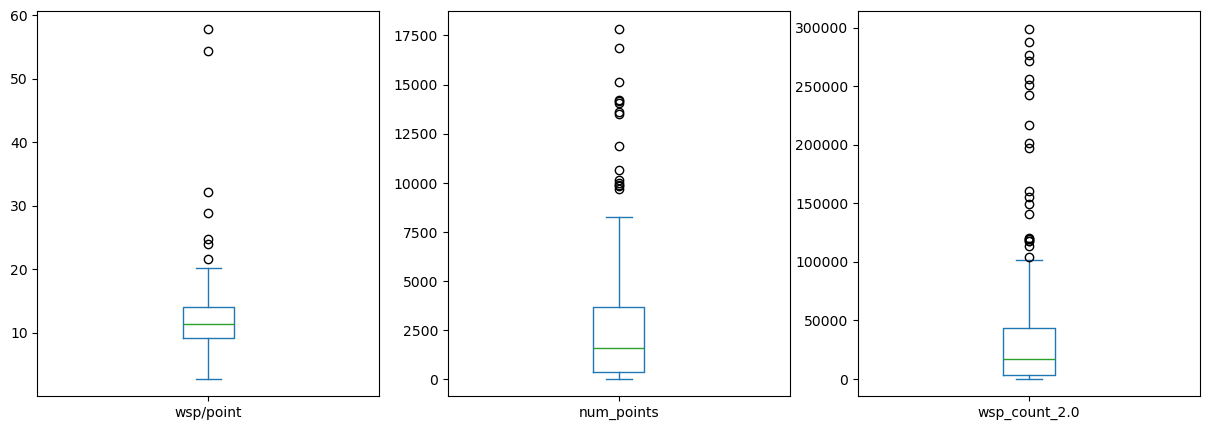

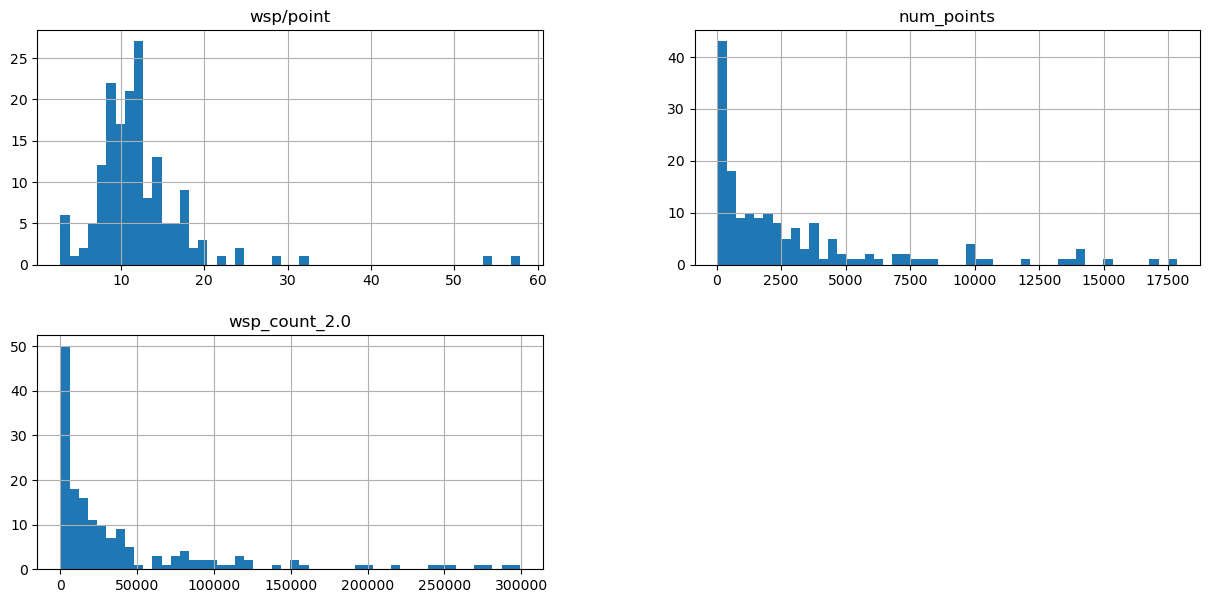

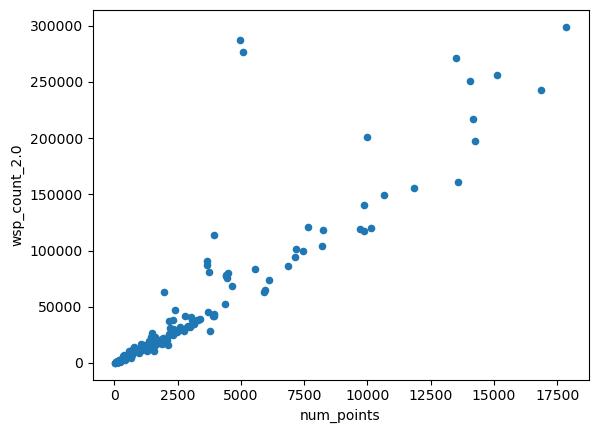

In [124]:
# Remove NAN wsp_counts and tell cells their format
df = df[~df['wsp_count_2.0'].isna()]
print(len(df))

fig, axs = plt.subplots(1,3, figsize=(15,5))
df["wsp/point"].plot.box(ax=axs[0])
df["num_points"].plot.box(ax=axs[1])
df["wsp_count_2.0"].plot.box(ax=axs[2])

df.hist(column=["wsp/point", "num_points", "wsp_count_2.0"], bins=50, figsize=(15,7))

df.plot.scatter("num_points", "wsp_count_2.0")

results = sm.OLS(df["wsp_count_2.0"].astype(int), df["num_points"]).fit()
results.summary()

In [125]:
df = df[~df['opt_len'].isna()] # remove problems without optimal lens

In [132]:
df["nn error"] = df["nn_len"] / df["opt_len"]
print(len(df))
df["num_points"].describe()

61


count       61.000000
mean      2713.967213
std       4042.740555
min         51.000000
25%        343.000000
50%       1083.000000
75%       2217.000000
max      16862.000000
Name: num_points, dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               nn error   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              755.3
Date:                Tue, 02 Jan 2024   Prob (F-statistic):                    1.08e-35
Time:                        10:19:40   Log-Likelihood:                         -21.535
No. Observations:                  61   AIC:                                      45.07
Df Residuals:                      60   BIC:                                      47.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.0988      0.004     27.483      0.000       0.092       0.106
==============================================================================
Omnibus:                        3.400   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.280
Skew:                          -0.520   Prob(JB):                        0.194
Kurtosis:                       2.543   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

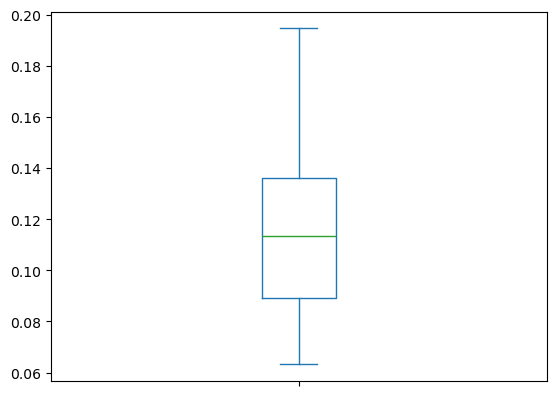

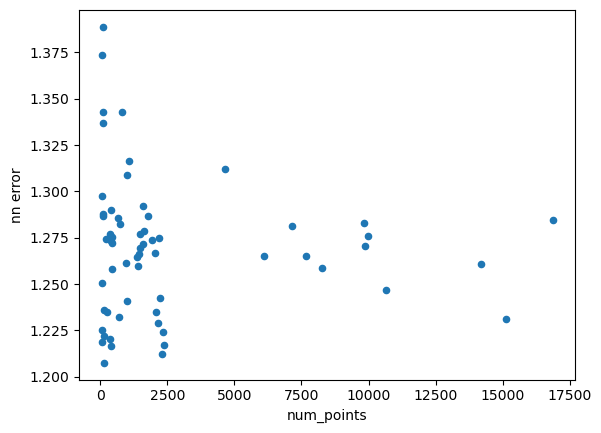

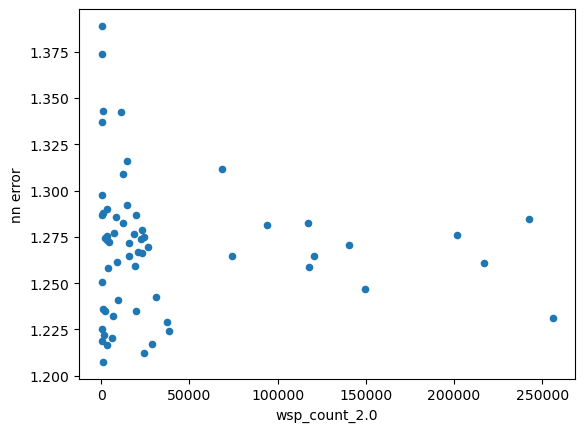

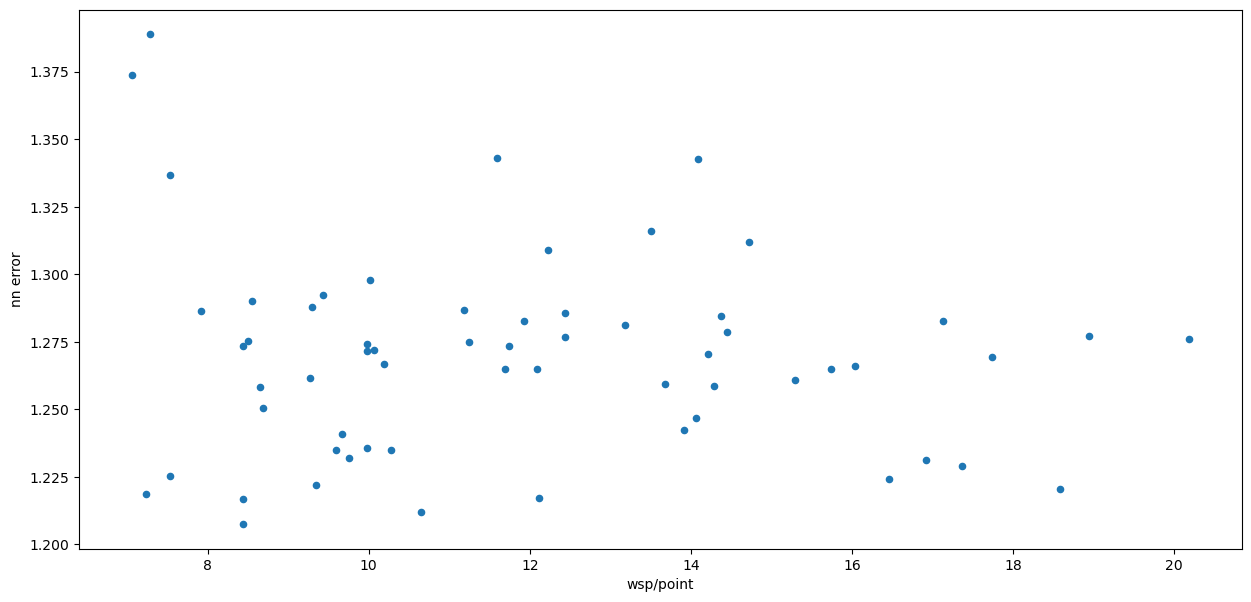

In [131]:
# df = df.drop("dj38") # outlier screws up how graph renders r^2 is 0.88 w/o them
# df = df.drop("dkd1973")

(df["nn error"] / df["wsp/point"]).plot.box()

df.plot.scatter("num_points", "nn error")
df.plot.scatter("wsp_count_2.0", "nn error")
fig, ax = plt.subplots(figsize=(15,7))
df.plot.scatter("wsp/point", "nn error", ax=ax)

# for k, v in df.iterrows():
#     ax.annotate(k, (v["wsp/point"], v["nn error"]))

results = sm.OLS(df["nn error"].astype(float), df["wsp/point"].astype(float)).fit()
results.summary()